### Выявление закономерностей определяющих успешность игры

**Интернет - магазин "СТРИМЧИК"** продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы: например, Xbox или PlayStation.

**Задача** - нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В нашем распоряжении данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. **Нужно отработать принцип работы с данными.** Не важно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. 

**!** В наборе данных попадается аббревиатура **ESRB** (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<span style="color:green">**План проекта:**</span> 
1. **Шаг 1.** Ознакомление с общей информацией
- Путь к файлу **/datasets/games.csv**
- Оценить количество и природу пропусков
- Посмотреть дубликаты
2. **Шаг 2.** Предобработка данных
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуем данные в нужные типы. 
- Обработаем пропуски там, где это необходимо.
     - Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом. 
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
3. **Шаг 3.** Исследовательский анализ данных
- Посмотрим, сколько игр выпускалось в разные годы. Определим, насколько нам важны данные за все периоды.
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы.
- Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. 
- Не будем учитывать в работе данные за предыдущие годы.
- Определим, какие платформы лидируют по продажам. Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 
- Соотнесем полученные выводы с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам. 
4. **Шаг 4.** Составим портрет пользователя каждого региона
- Определим для пользователя каждого региона (NA, EU, JP):
     - Самые популярные платформы (топ-5). 
     - Самые популярные жанры (топ-5). 
     - Влияет ли рейтинг ESRB на продажи в отдельном регионе.
5. **Шаг 5.** Проверим гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Общий вывод**

<span style="color:green">**Описание данных**</span> 

- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Примечание:** *Данные за 2016 год могут быть неполными.*

<span style="color:brown">**Импортируем все необходимые для работы библиотеки: для распаковки датафрейма, построения гистограмм, диаграмм и таблиц**</span> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats as st
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

### ШАГ 1. Ознакомление с общей информацией 

In [2]:
# Пропишем пути к датафрейму  
try:
    games= pd.read_csv('/datasets/games.csv')
except:
    games= pd.read_csv('games.csv')

In [3]:
pd.set_option('display.max_columns', None) # максимальное количество отображающихся столбцов файла
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Что сразу бросается в глаза:** Очень много NaN    
<span style="color:brown">Посмотрим сколько таких пропусков и в зависимости от количества будем принимать решение, что с ними делать</span>   

In [4]:
# Выведем общую информацию о датафрейме
games.info()
print('\nЧисло дубликатов:', games.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Число дубликатов: 0


**Вывод:** Итак, всего 16715 строк. В некоторых столбцах: **'Critic_Score', 'User_Score', 'Rating', 'Year_of_Release'**  есть пропущенные значения и некорректный тип данных в столбце **Year_of_Release**. Явные дубликаты отсутствуют.

### ШАГ 2. Предобработка данных 

<span style="color:brown">**Находим и изучаем пропущенные значения** </span>

In [5]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**По порядку:**
1. **"Name"**(название игры). Пропущено всего 2 значения. Ровно столько же в столбце 'Genre'. 
2. **"Year_of_Release"**(год выпуска). Пропущено около 1,6% данных (269/16715*100 =1,6%). Цифра не критическая, но возьмем в обработку.
3. **"Critic_Score"**(оценка критиков (максимум 100)). Пропущено около половины всех данных (8578/16715*100 =51,3%).Это важный критерий для анализа данных.
4. **"User_Score"**(оценка пользователей (максимум 10)). Также, много пропусков, около 40%. Предположим, что их просто нет.
5. **"Rating"**(рейтинг от организации ESRB). Пропущено наравне с оценкой пользователей. Также будем брать для анализа и обработаем.

<span style="color:brown">**Подготовим данные** </span>
- Названия столбцов не соответствуют snake_case, приведем их к нижнему регистру, выведем на экран

In [6]:
games.columns= games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<span style="color:brown">**Пропуски**</span>
   - В столбце **'name'** отсутствуют два значения, причем, в этих же строчках отсутствуют данные в столбце **'genre'**. Мы не можем заменить эти данные ни на среднее, ни на медианное значение, или восстановить каим-тот образом. Удаление 2-ух строк в нашей выборке не повлияет на результат. Удалим их.

In [7]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
games= games.dropna(subset= ['name']).reset_index(drop= True)

In [9]:
games[games['name'].isna()]# Проверим, что этих данных больше нет

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


   - В столбце **'year_of_release'** , как мы выяснили, 1.6 % данных отсутствуют. Это небольшое количество данных, которыми также можно пренебречь. Удалим их.  
*Можно было бы восстановить год по названию  игры, так как много повторений. Но есть игры, в которых нет года ни в одном варианте. Например, Rock Band. Вообще, не понятно, когда была выпущена игра.*

In [10]:
games= games.dropna(subset= ['year_of_release']).reset_index(drop= True)

- В столбце **'user_score'** , как мы выяснили, 40 % данных отсутствуют. Для аналитики это один из ключевых факторов, будем заполнять. Оценку нельзя заменить медианой или средним значением, каждый пользователь индивидуально оценивает игру. Поэтому, логично будет заменить на NaN. Кроме того, в столбце есть и другие значения.

In [11]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**"tbd"** - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. Мы будем заполнять такие пропуски на NaN. Очевидно, что это то же самое. 

In [12]:
# Посмотрим, сколько у нас таких значений
games[games['user_score']== 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16424,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16426,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16427,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16433,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


2376 значений, удалять нельзя. Точно, делаем замену **'tbd' на NaN**. Применим метод **replace**
- кроме того, данные имеют тип **object**, что не соответствует типу данных, это же числовое значение. Заменим на float.

In [13]:
games['user_score']= games['user_score'].replace('tbd', np.NaN)
games['user_score']= games['user_score'].astype('float')

In [14]:
games[games['user_score']=='tbd']# Проверим, что замена произошла

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


<span style="color:brown">**Преобразуем данные в нужные типы.**</span>
   - **'year_of_release'** приведем к целочисленному значению, год выпуска не может иметь тип float   

In [15]:
games['year_of_release']= games['year_of_release'].astype('Int64')
games['year_of_release']= games['year_of_release'].fillna(0)# меняем пропуски в столбце 'year_of_release' на 0

In [16]:
games.head()# Проверим, всё ли Ок

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Пропуски в столбце **rating** заменим на **ND**(no data). Пропуски в столбцах с оценками пользователей и критиков не будем заполнять, оставим как есть. Возможно, эти игры не были популярны, либо в это время не было возможности сбора информации о рейтингах, либо игра так и не вышла на мировой рынок.  

In [17]:
games['rating']= games['rating'].fillna(value='ND')
games['rating']= games['rating'].replace('K-A', 'E') # с 1998 года прошла замена K-A на E

In [18]:
games.head()# Проверим замену

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,ND
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,ND


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец **'total_sales'**

In [19]:
#games['total_sales']= games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games['total_sales']= games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [20]:
games.head()# Проверим

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,ND,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,ND,31.38


In [21]:
games.info()# Посмотрим теперь на общую информацию о нашем датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


**Вывод:** 
- Удалено из первоначальных данных 1,62% информации (небольшие потери, в пределах нормы), было 16715 строк, осталось 16444. 
- Заменили типы данных необходимых для дальнейшего исследования.
- Встретились с аббревиатурой "tbd", выяснили ее природу (недостаточное количество оценок для выставления общей), и в соответствии с этим, провели замену на NaN.
- Добавили дополнительные данные, столбец с суммарными продажами.

### Шаг 3. Исследовательский анализ данных

<span style="color:brown">**Посмотрим, сколько игр выпускалось в разные годы. Определим, насколько нам важны данные за все периоды**</span>

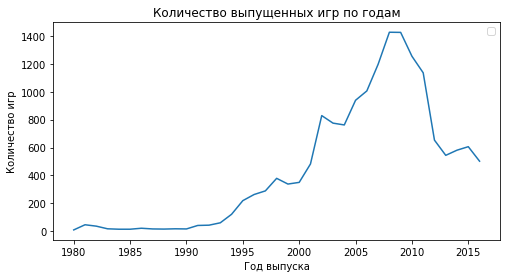

In [22]:
games_years= games.pivot_table(index= 'year_of_release', values= 'name', aggfunc= 'count')
plt.figure(figsize= (8,4))
sns.lineplot(data= games_years)
plt.title("Количество выпущенных игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество игр")
plt.legend('')
plt.show()

**Вывод:**
1. Начиная с 1980 по 1990 год игр, практически не производилось, и только с начала 90-ых, очень медленно, начался взлет игровой индустрии. Появились SEGA-игровые приставки, PS и компютеры, на которых уже можно было играть. Игры интересовали, практически, все возрастные группы, играли все. Поэтому, покупаемость их была велика. 
2. Самый пик продаж приходится на 2008 - 2009 годы. 
3. Спад продаж игр на консолях наблюдаем с 2008 по 2013, так как появились смартфоны с большим количеством мобильных игр и приложений. Предпочтение в эти годы стали отдавать пришедшим на замену игровым развлечениям соцсети (куда в дальнейшем перекочевали игры).

<span style="color:brown">**Посмотрим, как менялись продажи по платформам** </span>

Сначала соберем общую информацию с суммой продаж по каждой платформе. Воспользуемся методом pivot, создадам сводную таблицу

In [23]:
platform_sales= games.pivot_table(
    index= 'platform', values= 'total_sales', aggfunc= 'sum').sort_values(by= 'total_sales', ascending= False)
platform_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


 Сразу выделились лидеры платформ, их **6: PS2, X360, PS3, Wii, DS и PS**. Топ-10 не получится, так как большая разница в значениях суммарной выручки, не вариативно. Но еще момент, **PS4**, вышла на рынок только в 2013 году, поэтому не показала выручку наравне с другими платформами. Возьмем ее в ТОП.
 - построим диаграму

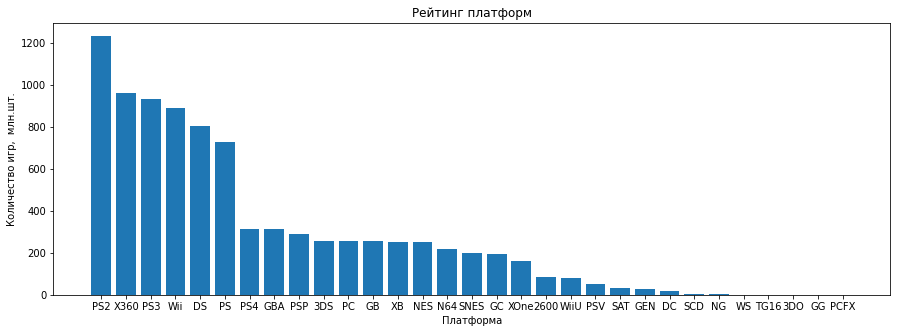

In [24]:
plt.figure(figsize=(15,5))
plt.bar(platform_sales.index, platform_sales['total_sales'])
plt.title('Рейтинг платформ')
plt.xlabel("Платформа");
plt.ylabel("Количество игр,  млн.шт.");

<span style="color:brown">**Построим график для наших лидеров с распределением по годам**</span>
- За какой характерный срок появляются новые и исчезают старые платформы

In [25]:
top_7_platforms= list(platform_sales.index[:7])# Создадим список ТОП-7 платформ, выведем его на экран
top_7_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4']

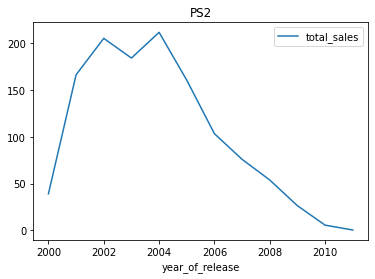

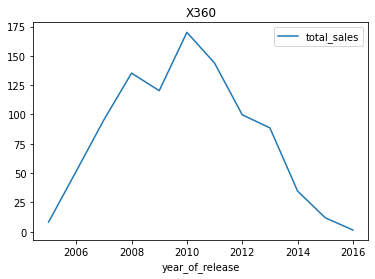

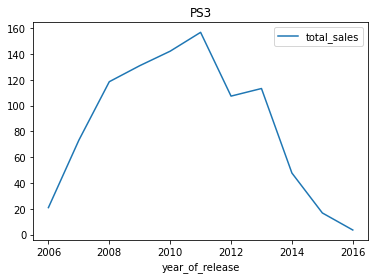

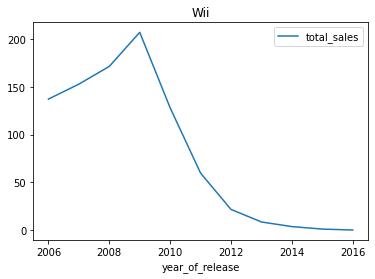

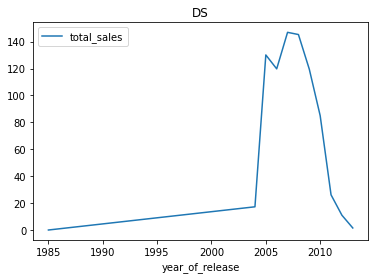

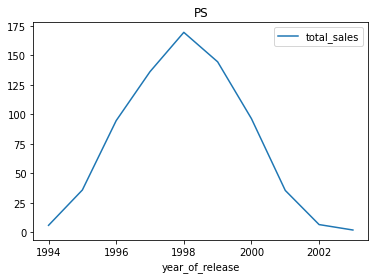

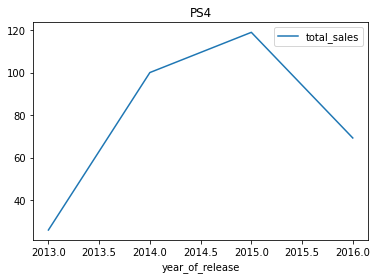

In [26]:
# Построим графики для каждой платформы. Используем метод pivot_table и цикл, чтобы он нам последовательно обработал все графики.
for platform in top_7_platforms:
    platform_sales = pd.pivot_table(games.query('platform == @platform'), index=['year_of_release'], values='total_sales', aggfunc='sum')
    platform_sales.plot();
    plt.title(platform)
    plt.show();

**Вывод:**
- Построив рейтинг платформ, определили ТОП-6: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'. Самые продаваемые это Sony Play Station и XBOX.

  - **PS2** Взлет продаж в первые два года, с 2000 по 2002 год, достигла своего апогея в 2004 году, и затем началось падение продаж. Так происходит, когда выходит более новая модель (PS3 в 2006 году), но разработчики продолжают поддерживать старую версию гаджета.
  - **X360** После выхода в 2005 году, 3 года роста продаж, затем небольшой спад в 2009 и снова рост до 2010 и плавное снижение продаж до 2016 года.
  - **PS3** Пришел на смену PS2 в 2006 году и по 2011 год увеличение объема продаж. Затем аналогичное с предыдущими графиками плавное падение, объясняемое всё теми же причинами.
  - **Wii** Высокий старт продаж среди других платформ. Причина такого успеха была банальной, низкая цена, всего 200 долларов, в отличие от Sony Play Station и XBOX. И в кризис 2008 года Wii стала спасением для многих семей с детьми, особенно в Америке.
  - **Nintendo DS** следующее поколение карманных игровых консолей компании Nintendo. Консоль была выпущена в 2004 году в Канаде, США и Японии, с чем и связан такой резкий старт продаж и их рост до 2008 года, после которого начался постепенный спад продаж.
  - **PS**. С 1994 по 1998 наблюдается уверенный рост, затем в том же темпе спад до 2005 года.
  - **PS4** С момента выхода  за пару лет дала уверенный прирост продаж, прошла свой пик в 2015 и плавно к сегодняшнему 2016-му пошла на снижение, но Продажи больше, чем на других платформах. 
  
- Исходя из данных, которые мы увидели на графиках, можно сказать, что, в среднем, консоли живут от 8-ми до 10 лет. Каждую прдыдущую сменяют новые поколения гаджетов, следуя требованиям технического прогресса.

 <span style="color:brown">Возьмем данные за соответствующий актуальный период. **Актуальный период** определим на основании исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.</span>

- Определим период, последние 5 лет, т.е. с 2012 по 2016. Мы определили, что консоли "живут" 8-10 лет, поэтому в данный период попаду все интересующие виды консолей.

In [27]:
actual_period= games[games['year_of_release'] >= 2012]
actual_period.info()
actual_period.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   Int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 295.9+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,ND,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,ND,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


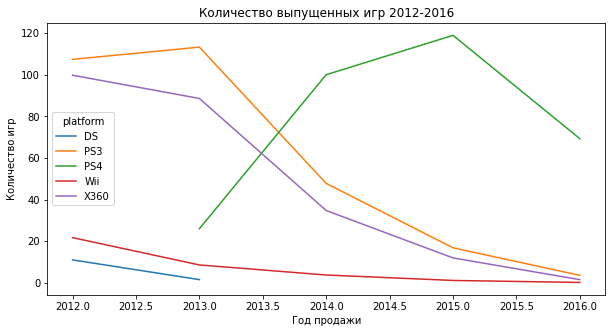

In [28]:
# Построим график по количеству выпущенных игр за актуальный период на разных платформах
(
    actual_period.query('platform in @top_7_platforms').
    pivot_table(index= 'year_of_release', columns= 'platform', values= 'total_sales', aggfunc= 'sum').
    plot(figsize= (10,5))
);
plt.title('Количество выпущенных игр 2012-2016')
plt.xlabel('Год продажи')
plt.ylabel('Количество игр')
plt.show()

- Кроме графика посмотрим еще и на цифры

In [29]:
# Суммарные продажи в выбранный период по годам на ТОП-6 платформах
actual_period_sales= pd.pivot_table(actual_period, index= ['platform','year_of_release'], values= 'total_sales', aggfunc= 'sum')
actual_period_sales 

total_sales
platform year_of_release             
3DS      2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2012                   11.01
         2013                    1.54
PC       2012                   23.22
         2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2012                  107.36
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2012                    7.69
         2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2012                   16.19
         2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2012                   21.71
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2012                   17.56
         2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

In [30]:
# Суммарные продажи на платформах
actual_period_sales_platform= pd.pivot_table(actual_period_sales, index= 'platform', values= 'total_sales', aggfunc= 'sum')
actual_period_sales_platform.sort_values('total_sales', ascending= False)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


**Вывод:**
- Можно сказать, что расцвет продаж игр пришелся на 2008-2009 годы. Затем идет спад продаж всех консолей, рынок игр падает.
- По выручке лидирует **PS4**, продажи падают, но всё равно платформа прибыльная. 
- **PS3** , практически, не остает от **PS4**, поэтому платформа также доходная.
- Продажи на консолях **X360, 3DS и  XOne** заметно ниже. Хотя **PS4** вышел на рынок только в ноябре 2013 года, уже успел опередить предшественников.
- **PC** будут актуальны всегда, особенно для реально увлеченных играми людей. 

**В сухом остатке** потенциально прибыльные:
   - PS4
   - X360
   - PS3
   - 3DS
   - XOne
- Берем еще PC.   

<span style="color:brown">**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**</span> 

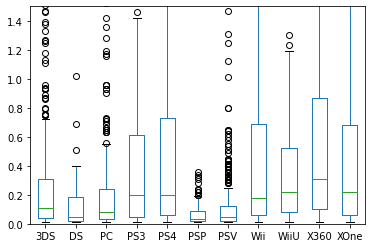

In [31]:
(
    actual_period.pivot_table(index= 'name', columns= 'platform', values= 'total_sales')
    .plot(kind= 'box', ylim= (0,1.5))
);

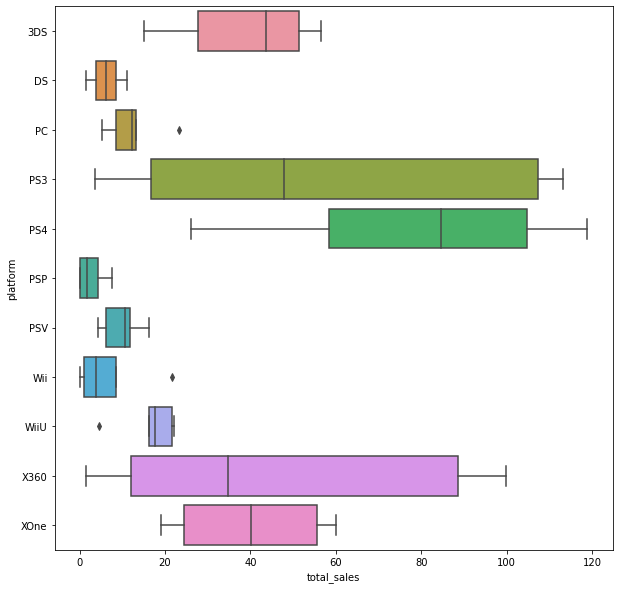

In [32]:
plt.figure(figsize=(10,10))
sns.boxplot(x= 'total_sales', y= 'platform', data= actual_period_sales.reset_index());

**Вывод:**
 - Видим, что график подтверждает сделанные нами предположения о потенциально прибыльных консолях. **PS4** по объемам меньше **PS3**, зато медиана выше. Такое жн соотношение видно и у пары **X360 и XOne**. И у **3DS** медиана, практически, на уровне **PS3**.
 - Для дальнейшего анализа оставим наиболее перспективную 5-ку платформ - **PS4, 3DS, XOne, Х360 и PC3**, а также еще не лишенную потенциала **РС**. 

<span style="color:brown">**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами**</span> 

**Начнем с корреляции отобранных нами платформ, по порядку:**

**PS4**

In [33]:
PS4= actual_period[actual_period['platform'] == 'PS4']
PS4_cor= PS4[['critic_score','user_score', 'total_sales']]
PS4_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


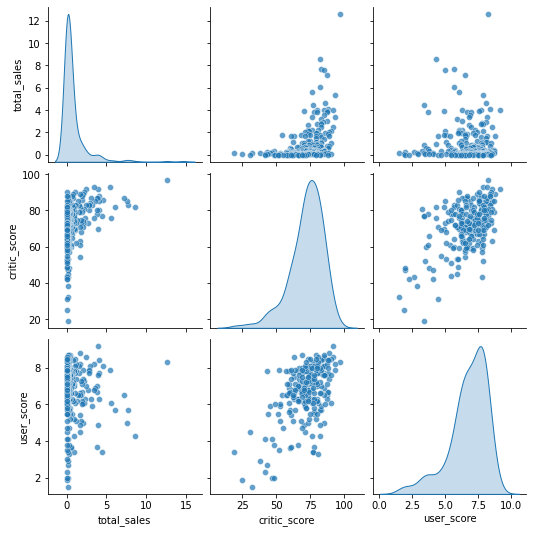

In [34]:
PS4= PS4.loc[:,['total_sales', 'critic_score', 'user_score']]# Сгруппируем и пострим графики плотности
sns.pairplot(PS4, diag_kind= 'kde', plot_kws= {'alpha': 0.7});

**PS3**

In [35]:
PS3= actual_period[actual_period['platform'] == 'PS3']
PS3_cor= PS3[['critic_score','user_score', 'total_sales']]
PS3_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.539456,0.331497
user_score,0.539456,1.000000,-0.005144
total_sales,0.331497,-0.005144,1.000000


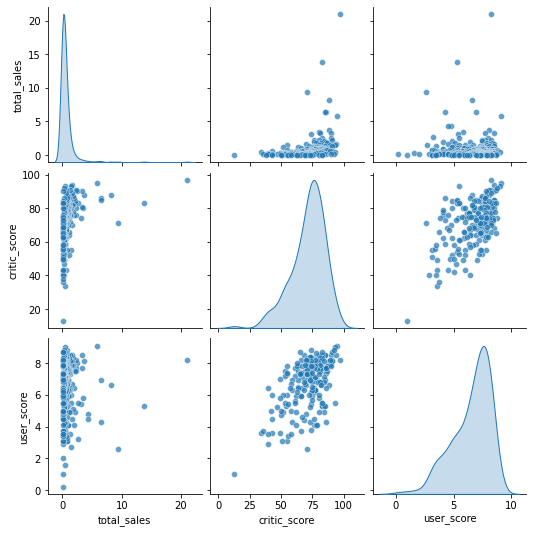

In [36]:
PS3 = PS3.loc[:,['total_sales', 'critic_score', 'user_score']]
sns.pairplot(PS3, diag_kind= 'kde', plot_kws= {'alpha': 0.7});

Для остальных 3-ёх платформ ограничимся табличными данными.

**XOne**

In [37]:
XOne= actual_period[actual_period['platform'] == 'XOne']
XOne_cor= XOne[['critic_score','user_score', 'total_sales']]
XOne_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


**Х360**

In [38]:
X360= actual_period[actual_period['platform'] == 'X360']
X360_cor= X360[['critic_score','user_score', 'total_sales']]
X360_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557352,0.360573
user_score,0.557352,1.000000,0.006164
total_sales,0.360573,0.006164,1.000000


**3DS**

In [39]:
DS3= actual_period[actual_period['platform'] == '3DS']
DS3_cor= DS3[['critic_score','user_score', 'total_sales']]
DS3_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.722762,0.320803
user_score,0.722762,1.000000,0.197583
total_sales,0.320803,0.197583,1.000000


**PC**

In [40]:
PC= actual_period[actual_period['platform'] == 'PC']
PC_cor= PC[['critic_score','user_score', 'total_sales']]
PC_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.432587,0.237243
user_score,0.432587,1.000000,-0.121867
total_sales,0.237243,-0.121867,1.000000


**Вывод:**
- Очевиден и схож с реальностью, чем выше оценка критиков и пользователей, тем более покупаем продукт, соответственно растет выручка. 
- На диаграммах хорошо заметно, что критики и пользователи ставят, в большинстве случаев, одни и те же оценки.
- Еще заметен такой факт: сильнее коррелируют продажи с оценками критиков, чем с оценками пользователей. И это тоже ближе к жизни: критики независимые эксперты, игроки чаще субъективны, "на вкус и цвет", как говорится. 
- Кроме того, разные платформы вышли на рынок в разное время, одни уже успели набрать популярность и получить оценки от пользователей, а некоторые только от критиков.

<span style="color:brown">**Соотнесем полученные выводы с продажами игр на других платформах**</span>
 - Возьмем те платформы, которые не такие популярны, но продолжают приносить хороший доход

In [41]:
for i in ["Wii", "WiiU", "PSV"]:
    print(i)    
    others_platform= actual_period.query('platform == @i')
    print(f'Корреляция между оценкой критиков и продажами: {others_platform.critic_score.corr(others_platform.total_sales):.2}')
    print(f'Корреляция между оценкой пользователей и продажами: {others_platform.user_score.corr(others_platform.total_sales):.2}')
    print(f'Корреляция между оценками критиков и пользователей: {others_platform.critic_score.corr(others_platform.user_score):.2}')
    print('*' * 60)     

Wii
Корреляция между оценкой критиков и продажами: -0.42
Корреляция между оценкой пользователей и продажами: 0.3
Корреляция между оценками критиков и пользователей: 0.82
************************************************************
WiiU
Корреляция между оценкой критиков и продажами: 0.35
Корреляция между оценкой пользователей и продажами: 0.4
Корреляция между оценками критиков и пользователей: 0.77
************************************************************
PSV
Корреляция между оценкой критиков и продажами: 0.094
Корреляция между оценкой пользователей и продажами: -0.0043
Корреляция между оценками критиков и пользователей: 0.7
************************************************************


**Вывод:**
- Очень хорошо видно, что на продажи этих консолей не влияют ни критики, ни пользователи, хотя корреляция с критиками сильнее. Продукт давно на рынке, и особо не нуждаются в принятии решения о покупке.
- Сильная корреляция между оценками пользователей и критиков только 3DS, на остальных послабее. Но всё же, можно сказать, что и здесь оба сектора ставят одни и те же оценки. 
- Есть ещё и другие определяющие факторы, например, эксклюзивность игры только для одной платформы или в одной стране.

<span style="color:brown">**Посмотрим на общее распределение игр по жанрам**</span>
- Лучше всего это распределение можно увидеть на круговой диаграмме.

- Вот и определился "локомотив" из 5 популярных жанров: Action("К бою!"), Shooter("стрелялки"), Sports(спортивные соревнования), Role-Playing(ролевые) и Misc(разное). 
- Подтвердим это цифрами, сформируем сводную таблицу с продажами по жанрам.

In [42]:
actual_genre = pd.pivot_table(actual_period, index='genre', values='total_sales',
                                        aggfunc='sum').sort_values('total_sales', ascending=False)
actual_genre

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


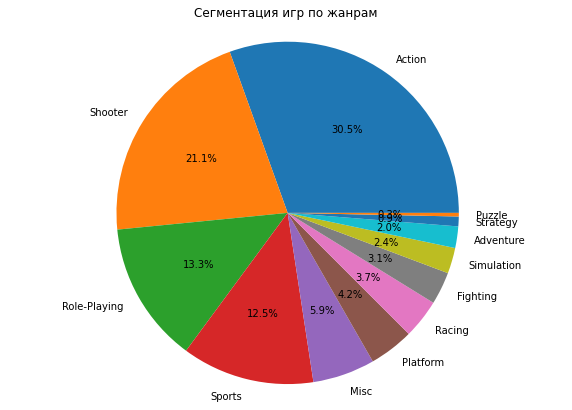

In [43]:
plt.figure(figsize=(10,7))
actual_genre_rownd= actual_genre.reset_index()
plt.pie(actual_genre_rownd['total_sales'],labels= actual_genre_rownd['genre'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Сегментация игр по жанрам')
plt.show()

**Вывод:**
- Самый предпочтительный жанр это **Action**. Выручка от продаж как от **Sports, Misc и Role-Playing** вместе взятых. 
- На последнем месте **Puzzle и Strategy** (игры, где требуется внимание, логика и уситчивость).

In [44]:
actual_period_genre= pd.pivot_table(actual_period, index= 'genre', values= 'total_sales', aggfunc= {'total_sales': ['mean', 'median']})
display(actual_period_genre.sort_values('mean', ascending= False))
display(actual_period_genre.sort_values('median', ascending= False))

,mean,median
genre,,
Shooter,1.296723,0.440
Platform,0.717647,0.210
Sports,0.675634,0.240
Role-Playing,0.521081,0.140
Racing,0.465217,0.140
Misc,0.442917,0.120
Simulation,0.439000,0.120
Action,0.427856,0.120
Fighting,0.408165,0.130


,mean,median
genre,,
Shooter,1.296723,0.440
Sports,0.675634,0.240
Platform,0.717647,0.210
Role-Playing,0.521081,0.140
Racing,0.465217,0.140
Fighting,0.408165,0.130
Action,0.427856,0.120
Misc,0.442917,0.120
Simulation,0.439000,0.120


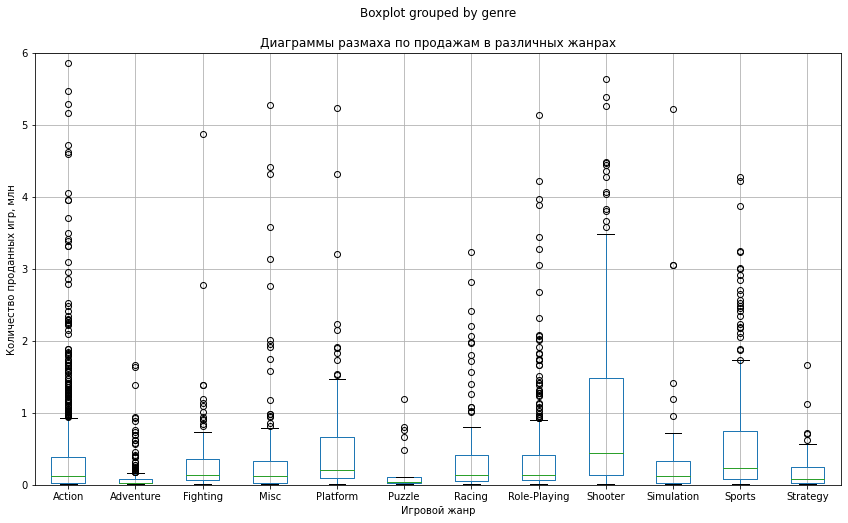

In [45]:
actual_period[['total_sales', 'genre']].boxplot(column='total_sales', by='genre', figsize=(14,8))

plt.xlabel('Игровой жанр')
plt.ylabel('Количество проданных игр, млн')
plt.title('Диаграммы размаха по продажам в различных жанрах')
plt.ylim(0,6)
plt.show()

**Вывод:** 

Картина поменялась, не всегда общие цифры такие однозначные.
- Теперь у нас лидер продаж - игры в жанре **Shooter**. Это видно и по таблице и на диаграмме размаха.
- По объемам продаж никакой жанр даже не приблизился к данному жанру. На втором месте это **Sport и Platform**, но есть сравнимые с ними по медиане продаж - **Platform**.
- Далее **Role-Playing и Racing**.
- **Action** по медианному значению только на 7-ом месте.

### Шаг 4. Составим портрет пользователя каждого региона

<span style="color:brown">**Определим для пользователя каждого региона (NA, EU, JP):**</span>
    - Самые популярные платформы (топ-5)
    

**NA** Северная Америка

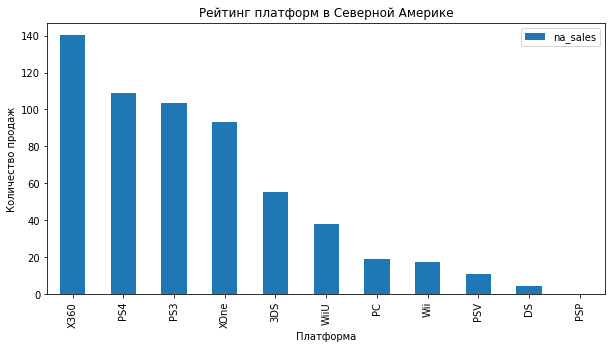

In [46]:
#Построим столбчатые диаграммы, для визуализации нужной нам информации они подходят луше всего
(
    actual_period.pivot_table(index= 'platform', values= 'na_sales', aggfunc= 'sum').
    sort_values(ascending= False, by= 'na_sales').plot(kind= 'bar', figsize= (10,5))
);
plt.title('Рейтинг платформ в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

На первом месте по популярности у геймеров Северной Америки конечно же **X360**, так как это их продукт. Платформы **Wii, PS3, PS4** японские, но тоже очень популярны, а по сумме продаж превышают продажи на америкаской платформе.

**EU** Европа

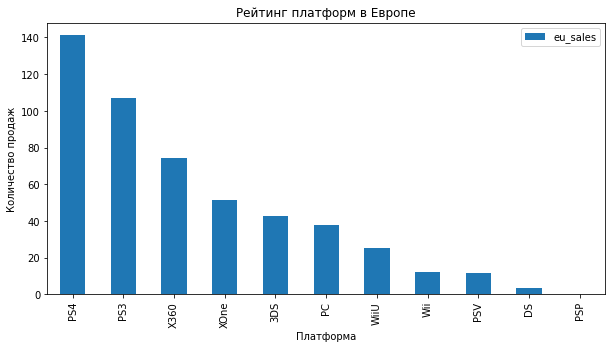

In [47]:
(
    actual_period.pivot_table(index= 'platform', values= 'eu_sales', aggfunc= 'sum').
    sort_values(ascending= False, by= 'eu_sales').plot(kind= 'bar', figsize= (10,5))
);
plt.title('Рейтинг платформ в Европе')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

В Европе, почти те же предпочтения, что и в NA, но первое место заняла всё же японская консоль **PS3**. Затем в рейтинге **X360, PS4, PC, Wii**.  

**JP** Япония

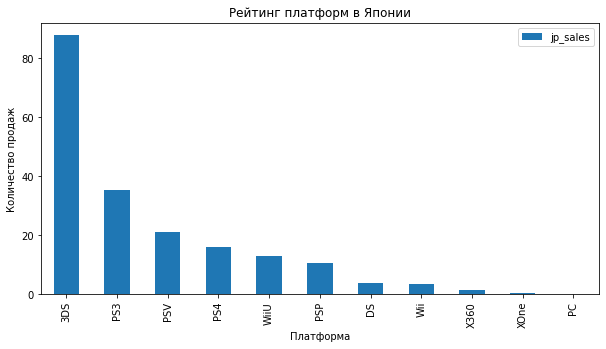

In [48]:
(
    actual_period.pivot_table(index= 'platform', values= 'jp_sales', aggfunc= 'sum').
    sort_values(ascending= False, by= 'jp_sales').plot(kind= 'bar', figsize= (10,5))
);
plt.title('Рейтинг платформ в Японии')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

Японцы предпочитают свой продукт, играют на своих платформах, у них самая широкая линейка платформ. Первое место заняла **3DS** платформа. Затем **PS3, PSP и DS**. Замыкает 5-ку PSV, которая ни в Европе, ни в Америке вообще не популярна, но доходы от продаж сравнимы с продажами в Японии.

   - Самые популярные жанры (топ-5)

**NA** Северная Америка

In [49]:
(
    actual_period.pivot_table(index= 'genre', values= 'na_sales', aggfunc= 'sum').
    sort_values(ascending= False, by= 'na_sales').head()
)

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


**EU** Европа

In [50]:
(
    actual_period.pivot_table(index= 'genre', values= 'eu_sales', aggfunc= 'sum').
    sort_values(ascending= False, by= 'eu_sales').head()
)

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


**JP** Япония

In [51]:
(
    actual_period.pivot_table(index= 'genre', values= 'jp_sales', aggfunc= 'sum').
    sort_values(ascending= False, by= 'jp_sales').head()
)

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


<span style="color:blue">Вывод:
- Предпочтения в жанрах очень схожи у Америки с Европой: 
   - Action/Action 
   - Shooter/Shooter 
   - Sports/Sports 
   - Role-Playing/Role-Playing
   - Misc/Racing	
- Европейцы предпочитают гонки.
- А вот в Японии свой мир игровых жанров: 
   - Role-Playing
   - Action
   - Misc
   - Simulation
   - Fighting
- Ни спорт, ни "стрелялки", ни гонки их не привлекают. У них больше интелектуальных игр. </span>

<span style="color:brown">**Влияет ли рейтинг ESRB на продажи в отдельном регионе**</span>

In [52]:
ESRB= actual_period.pivot_table(index= 'rating', values= ['na_sales', 'eu_sales', 'jp_sales'], aggfunc= 'sum')
ESRB

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
ND,91.50,108.84,103.31
T,52.96,26.02,66.02


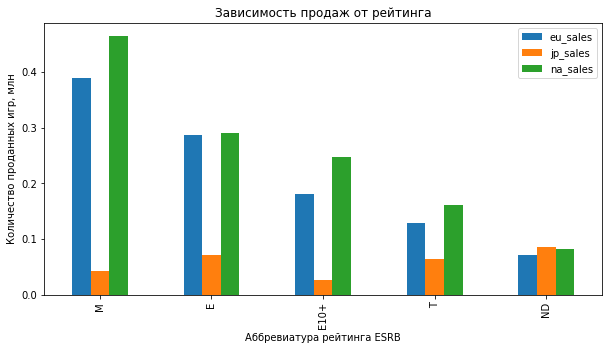

In [53]:
(
    actual_period.pivot_table(index= 'rating', values= ['na_sales', 'eu_sales', 'jp_sales'], aggfunc= 'mean').
    sort_values(by= 'na_sales', ascending= False).
    plot(kind= 'bar', figsize= (10, 5))
);
plt.xlabel('Аббревиатура рейтинга ESRB')
plt.ylabel('Количество проданных игр, млн')
plt.title('Зависимость продаж от рейтинга')
plt.show()

**Вывод:**

- **Портрет пользователя Северной Америки:**
  - На первом месте по популярности **X360.** Платформы **Wii, PS3, PS4** японские, но тоже очень популярны.
  - Топ-5 предпочтительных жанров: **Action, Sports, Shooter** и уже потом **Misc, Role-Playing**.
  - Больше всего продаж игр с рейтингом **М "от 17 и выше"**, на втором месте игры с рейтингом **Т "от 13 и выше"** и на третьем месте игры с рейтингом **Е10+ "от 10 и выше"**. 
- **Портрет пользователя Европы:**
  - В Европе, почти те же предпочтения, что и в Америке, но первое место принадлежит **PS3**. Затем в рейтинге **X360, PS4, PC, Wii**
  - Топ-5 предпочтительных жанров схожи с Америкой: **Action, Sports, Shooter, Misc и Role-Playing**. 
  - На продажи больше всего оказывают влияние рейтинги: **М, Е"для всех", Т**.
- **Портрет пользователя Японии:**
  - Японцы предпочитают свой продукт, играют на своих платформах. Лидирует **3DS** платформа. Затем **PS3, PSP и DS**. Замыкает 5-ку **PSV**. 
  - Топ-5 предпочтительных жанров: **Role-Playing** с большим отрывом, затем **Action, Misc, Platform и Adventure**. Японские геймеры не любят "стрелялки", но зато любят "приключения" и "бродилки".
  - Больше всего продаж игр неоцененных международными критиками. Но в Японии есть своя некоммерческая организация, которая занимается присвоением рейтинга компьютерным играм, CERO. Следующие в рейтинге - **Е "для всех"**, затем  **Т "от 13 и выше"**.
  
- Кроме того, игры с рейтингом **ЕС "от 3 лет и выше"** продавались только в Америке, а вот с рейтингом **RP "рейтинг ожидается"** покупали только в Европе.

### **Шаг 5.** Проверим гипотезы

 1. **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**
 2. **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

<span style="color:brown">1. Сформулируем основную (нулевую) и альтернативную гипотезы. Они должны быть противоречащими, поэтому:</span>
- H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H₁: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [54]:
XOne= actual_period[(actual_period['platform'] == 'XOne') &  (actual_period['user_score'] > 0)]['user_score']
PC= actual_period[(actual_period['platform'] == 'PC') &  (actual_period['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC', PC.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC 6.4286407766990274


In [55]:
# Зададим самостоятельно коэффициент alpha, применим тест Стюдента
alpha= 0.05

results= st.ttest_ind(XOne, PC, equal_var= False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


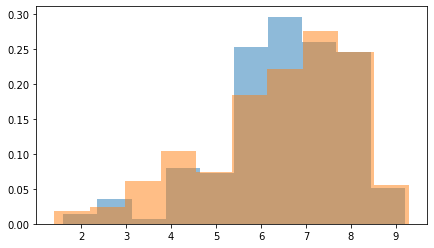

In [56]:
fig, ax= plt.subplots(figsize=(7, 4))
ax.hist(actual_period[(actual_period.platform == "XOne") & (actual_period.user_score.notna())]['user_score'], bins= 10, density= True, alpha= 0.5)
ax.hist(actual_period[(actual_period.platform == "PC") & (actual_period.user_score.notna())]['user_score'], bins= 10, density= True, alpha= 0.5)
plt.show()

Значение p-value 98%. То есть, с высокой степенью вероятности оценки пользователей на этих платформах совпадают.

Принимаем H₀ гипотезу: **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

<span style="color:brown">2. Сформулируем основную (нулевую) и альтернативную гипотезы. Они должны быть противоречащими, поэтому:</span>
- H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- H₁: Средние пользовательские рейтинги жанров Action и Sports разные

In [57]:
Action= actual_period[(actual_period['genre'] == 'Action') &  (actual_period['user_score'] > 0)]['user_score']
Sports= actual_period[(actual_period['genre'] == 'Sports') &  (actual_period['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())

Средний пользовательский рейтинг жанра Action: 6.825047801147227
Средний пользовательский рейтинг жанра Sports 5.455897435897437


In [58]:
# Зададим самостоятельно коэффициент alpha, применим тест Стюдента
alpha= 0.05

results= st.ttest_ind(Action, Sports, equal_var= False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


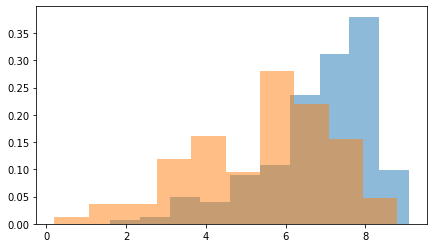

In [59]:
fig, ax= plt.subplots(figsize=(7, 4))
ax.hist(actual_period[(actual_period.genre == "Action") & (actual_period.user_score.notna())]['user_score'], bins=10, density=True, alpha=0.5)
ax.hist(actual_period[(actual_period.genre == "Sports") & (actual_period.user_score.notna())]['user_score'], bins=10, density=True, alpha = 0.5)
plt.show()

Значение p-value очень мало. Мы приняли критический уровень вероятности 5%, вследствие этого гипотезу отвергаем, как маловероятную. Оценки пользователей на этих платформах отличаются. Это очевидно и визуально.

Отклоняем H₀ гипотезу, принмаем, что: **Средние пользовательские рейтинги жанров Action и Sports разные**

### ОБЩИЙ ВЫВОД

Нами было проведено исследование данных, задачей которого было выявить определяющие успешность игры закономерности. 

Входные данные -  Выборка  данными о видеоиграх, вышедших на рынок игровой индустрии с 1980 по 2016 годы на различных платформах: игровые приставки, консоли и ПК.

Результаты исследования позволят нам сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Необходимо было определить:
1. Срок жизни платформ, как менялись продажи по платформам. Определить ТОПовые.
2. Акктуальный период  для более точного анализа-прогноза на 2017 год.
3. Влияние оценок критиков и пользователей на продажи. 
4. Портрет пользователя для отдельно взятого региона в Северной Америке, Европе и Японии. 
5. Гипотезы:
   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
   - Средние пользовательские рейтинги жанров Action и Sports разные.

Проведя исследования по предоставленным данным, выявили следующее:

**Задача №1:** 
 
   - В среднем платфрмы "живут" от 8-ми до 10 лет. Все хорошо стартуют, достигают своего апогея, и затем плавно снижаются. Падение продаж консоли начинаеи=тся в момент выхода консоли следующего поколения или в предверие, ожидание выхода.
   
**Задача №2:** 
   
   - На основании полученных данных в певой задаче определили небольшой период, начиная с 2010 года, момент, когда в данный промежуток попадают, практически, все консоли и есть запас для платформ, вышедших за 8 лет до 2017.
   
**Задача №3:** 
   
- Выявили, что оценки критиков и пользователей очень похожи.
- Продажи больше коррелируют с оценками критиков, чем с оценками пользователей. 

**Задача №4:** 

- **Портрет пользователя Северной Америки:**
  - На первом месте по популярности **X360.** Платформы **Wii, PS3, PS4** японские, но тоже очень популярны.
  - Топ-5 предпочтительных жанров: **Action, Sports, Shooter** и уже потом **Misc, Role-Playing**.
  - Больше всего продаж игр с рейтингом **М "от 17 и выше"**, на втором месте игры с рейтингом **Т "от 13 и выше"** и на третьем месте игры с рейтингом **Е10+ "от 10 и выше"**. 
- **Портрет пользователя Европы:**
  - В Европе, почти те же предпочтения, что и в Америке, но первое место принадлежит **PS3**. Затем в рейтинге **X360, PS4, PC, Wii**
  - Топ-5 предпочтительных жанров схожи с Америкой: **Action, Sports, Shooter, Misc и Role-Playing**. 
  - На продажи больше всего оказывают влияние рейтинги: **М, Е"для всех", Т**.
- **Портрет пользователя Японии:**
  - Японцы предпочитают свой продукт, играют на своих платформах. Лидирует **3DS** платформа. Затем **PS3, PSP и DS**. Замыкает 5-ку **PSV**. 
  - Топ-5 предпочтительных жанров: **Role-Playing** с большим отрывом, затем **Action, Misc, Platform и Adventure**. Японские геймеры не любят "стрелялки", но зато любят "приключения" и "бродилки".
  - Больше всего продаж игр неоцененных международными критиками. Но в Японии есть своя некоммерческая организация, которая занимается присвоением рейтинга компьютерным играм, CERO. Следующие в рейтинге - **Е "для всех"**, затем  **Т "от 13 и выше"**.
  
**Задача №5:**  
 
- **Гипотеза 1:** Принимаем H₀ гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- **Гипотеза 2:** Отклоняем H₀ гипотезу, принмаем, что: Средние пользовательские рейтинги жанров Action и Sports разные.
  

**ОБЩИЕ РЕКОМЕНДАЦИИ**
1. Взять в продажу на 2017 год игры для приставок **PS4**, **X360**.
2. Рекомендуемые жанры - **Action, Shooter** .
3. Рекомендуемый рейтинг **М "от 17 и выше"**, он дает больше всего прибыли.

*Дополнительно: С появлением игр всё более ресурснозатратных, похожих уже на реальные фильмы, для них возможно использование только высокотехнологичных консолей и ПК. Поэтому, в перспективе, весь игровой мир уйдет в интернет, на смартфонах игры только для того, чтобы отвлечься, скоротать время*. 